In [3]:
import pandas as pd
import numpy as np
PATH = '/content/drive/My Drive/Colab Notebooks/kaggle-rossmann-master/rossmann/rossmann/'

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
joined_train = pd.read_feather(PATH+'joined_train_before_durations.fth')
joined_test = pd.read_feather(PATH+'joined_test_before_durations.fth')

# Paso StateHoliday a booleana

In [5]:
joined_train['StateHoliday'].value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

a = public holiday, b = Easter holiday, c = Christmas, 0 = None

In [7]:
joined_train['StateHoliday_bool'] = joined_train.StateHoliday!='0'
joined_test['StateHoliday_bool'] = joined_test.StateHoliday!='0'

## Durations

### Agrega columnas con "antes" y "despues" de eventos

In [8]:
columns = ["Date", "Store", "Promo", "StateHoliday_bool", "SchoolHoliday"]

In [9]:
class elapsed(object):
    def __init__(self, fld):
        self.fld = fld
        self.last = pd.to_datetime(np.nan)
        self.last_store = 0
        
    def get(self, row):
        if row.Store != self.last_store:
            self.last = pd.to_datetime(np.nan)
            self.last_store = row.Store
        if (row[self.fld]): self.last = row.Date
        return row.Date-self.last

In [10]:
df_train = joined_train[columns]
df_test = joined_test[columns]

In [11]:
df_train.head()

,Date,Store,Promo,StateHoliday_bool,SchoolHoliday
0,2015-07-31,1,1,False,1
1,2015-07-31,2,1,False,1
2,2015-07-31,3,1,False,1
3,2015-07-31,4,1,False,1
4,2015-07-31,5,1,False,1


In [12]:
df_test.head()

,Date,Store,Promo,StateHoliday_bool,SchoolHoliday
0,2015-09-17,1,1,False,0
1,2015-09-17,3,1,False,0
2,2015-09-17,7,1,False,0
3,2015-09-17,8,1,False,0
4,2015-09-17,9,1,False,0


In [13]:
def add_elapsed(df, fld, prefix):
    sh_el = elapsed(fld)
    df[prefix+fld] = df.apply(sh_el.get, axis=1)

In [14]:
fld = 'SchoolHoliday'
df_train = df_train.sort_values(['Store', 'Date'])
add_elapsed(df_train, fld, 'After')
df_train.head()

,Date,Store,Promo,StateHoliday_bool,SchoolHoliday,AfterSchoolHoliday
1016095,2013-01-01,1,0,True,1,0 days
1014980,2013-01-02,1,0,False,1,0 days
1013865,2013-01-03,1,0,False,1,0 days
1012750,2013-01-04,1,0,False,1,0 days
1011635,2013-01-05,1,0,False,1,0 days


In [15]:
df_test = df_test.sort_values(['Store', 'Date'])
add_elapsed(df_test, fld, 'After')
df_test.head()

,Date,Store,Promo,StateHoliday_bool,SchoolHoliday,AfterSchoolHoliday
40232,2015-08-01,1,0,False,1,0 days
39376,2015-08-02,1,0,False,1,0 days
38520,2015-08-03,1,1,False,1,0 days
37664,2015-08-04,1,1,False,1,0 days
36808,2015-08-05,1,1,False,1,0 days


In [16]:
df_train = df_train.sort_values(['Store', 'Date'], ascending=[True, False])
add_elapsed(df_train, fld, 'Before')
df_train.head()

,Date,Store,Promo,StateHoliday_bool,SchoolHoliday,AfterSchoolHoliday,BeforeSchoolHoliday
0,2015-07-31,1,1,False,1,0 days,0 days
1115,2015-07-30,1,1,False,1,0 days,0 days
2230,2015-07-29,1,1,False,1,0 days,0 days
3345,2015-07-28,1,1,False,1,0 days,0 days
4460,2015-07-27,1,1,False,1,0 days,0 days


In [17]:
df_test = df_test.sort_values(['Store', 'Date'], ascending=[True, False])
add_elapsed(df_test, fld, 'Before')
df_test.head()

,Date,Store,Promo,StateHoliday_bool,SchoolHoliday,AfterSchoolHoliday,BeforeSchoolHoliday
0,2015-09-17,1,1,False,0,13 days,NaT
856,2015-09-16,1,1,False,0,12 days,NaT
1712,2015-09-15,1,1,False,0,11 days,NaT
2568,2015-09-14,1,1,False,0,10 days,NaT
3424,2015-09-13,1,0,False,0,9 days,NaT


In [18]:
fld = 'StateHoliday_bool'
df_train = df_train.sort_values(['Store', 'Date'])
add_elapsed(df_train, fld, 'After')
df_train = df_train.sort_values(['Store', 'Date'], ascending=[True, False])
add_elapsed(df_train, fld, 'Before')

In [19]:
fld = 'StateHoliday_bool'
df_test = df_test.sort_values(['Store', 'Date'])
add_elapsed(df_test, fld, 'After')
df_test = df_test.sort_values(['Store', 'Date'], ascending=[True, False])
add_elapsed(df_test, fld, 'Before')

In [20]:
fld = 'Promo'
df_train = df_train.sort_values(['Store', 'Date'])
add_elapsed(df_train, fld, 'After')
df_train = df_train.sort_values(['Store', 'Date'], ascending=[True, False])
add_elapsed(df_train, fld, 'Before')

In [21]:
fld = 'Promo'
df_test = df_test.sort_values(['Store', 'Date'])
add_elapsed(df_test, fld, 'After')
df_test = df_test.sort_values(['Store', 'Date'], ascending=[True, False])
add_elapsed(df_test, fld, 'Before')

In [22]:
df_train.head(10)

,Date,Store,Promo,StateHoliday_bool,SchoolHoliday,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday_bool,BeforeStateHoliday_bool,AfterPromo,BeforePromo
0,2015-07-31,1,1,False,1,0 days,0 days,57 days,NaT,0 days,0 days
1115,2015-07-30,1,1,False,1,0 days,0 days,56 days,NaT,0 days,0 days
2230,2015-07-29,1,1,False,1,0 days,0 days,55 days,NaT,0 days,0 days
3345,2015-07-28,1,1,False,1,0 days,0 days,54 days,NaT,0 days,0 days
4460,2015-07-27,1,1,False,1,0 days,0 days,53 days,NaT,0 days,0 days
5575,2015-07-26,1,0,False,0,107 days,-1 days,52 days,NaT,9 days,-1 days
6690,2015-07-25,1,0,False,0,106 days,-2 days,51 days,NaT,8 days,-2 days
7805,2015-07-24,1,0,False,0,105 days,-3 days,50 days,NaT,7 days,-3 days
8920,2015-07-23,1,0,False,0,104 days,-4 days,49 days,NaT,6 days,-4 days
10035,2015-07-22,1,0,False,0,103 days,-5 days,48 days,NaT,5 days,-5 days


In [23]:
df_train = df_train.set_index("Date")
df_test = df_test.set_index("Date")

In [24]:
df_train.sort_values('Date').head(5)

,Store,Promo,StateHoliday_bool,SchoolHoliday,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday_bool,BeforeStateHoliday_bool,AfterPromo,BeforePromo
Date,,,,,,,,,,
2013-01-01,1115,0,True,1,0 days,0 days,0 days,0 days,NaT,-6 days
2013-01-01,746,0,True,1,0 days,0 days,0 days,0 days,NaT,-6 days
2013-01-01,171,0,True,1,0 days,0 days,0 days,0 days,NaT,-6 days
2013-01-01,694,0,True,1,0 days,0 days,0 days,0 days,NaT,-6 days
2013-01-01,396,0,True,1,0 days,0 days,0 days,0 days,NaT,-6 days


NaT: Not a Time

In [25]:
df_test.sort_values('Date').head(5)

,Store,Promo,StateHoliday_bool,SchoolHoliday,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday_bool,BeforeStateHoliday_bool,AfterPromo,BeforePromo
Date,,,,,,,,,,
2015-08-01,553,0,False,0,NaT,-2 days,NaT,NaT,NaT,-2 days
2015-08-01,394,0,False,1,0 days,0 days,NaT,NaT,NaT,-2 days
2015-08-01,393,0,False,0,NaT,-2 days,NaT,NaT,NaT,-2 days
2015-08-01,392,0,False,0,NaT,-2 days,NaT,NaT,NaT,-2 days
2015-08-01,391,0,False,0,NaT,-2 days,NaT,NaT,NaT,-2 days


### Elimina los NaT

In [26]:
columns = ['SchoolHoliday', 'StateHoliday_bool', 'Promo']

In [27]:
for o in ['Before', 'After']:
    for p in columns:
        a = o+p
        df_train[a] = df_train[a].fillna(pd.Timedelta(0)).dt.days
        df_test[a] = df_test[a].fillna(pd.Timedelta(0)).dt.days

In [28]:
df_train.sort_values('Date').head(10)

,Store,Promo,StateHoliday_bool,SchoolHoliday,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday_bool,BeforeStateHoliday_bool,AfterPromo,BeforePromo
Date,,,,,,,,,,
2013-01-01,1115,0,True,1,0,0,0,0,0,-6
2013-01-01,746,0,True,1,0,0,0,0,0,-6
2013-01-01,171,0,True,1,0,0,0,0,0,-6
2013-01-01,694,0,True,1,0,0,0,0,0,-6
2013-01-01,396,0,True,1,0,0,0,0,0,-6
2013-01-01,196,0,True,1,0,0,0,0,0,-6
2013-01-01,271,0,True,1,0,0,0,0,0,-6
2013-01-01,32,0,True,1,0,0,0,0,0,-6
2013-01-01,440,0,True,1,0,0,0,0,0,-6


In [29]:
df_test.sort_values('Date').head(10)

,Store,Promo,StateHoliday_bool,SchoolHoliday,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday_bool,BeforeStateHoliday_bool,AfterPromo,BeforePromo
Date,,,,,,,,,,
2015-08-01,553,0,False,0,0,-2,0,0,0,-2
2015-08-01,394,0,False,1,0,0,0,0,0,-2
2015-08-01,393,0,False,0,0,-2,0,0,0,-2
2015-08-01,392,0,False,0,0,-2,0,0,0,-2
2015-08-01,391,0,False,0,0,-2,0,0,0,-2
2015-08-01,389,0,False,0,0,-2,0,0,0,-2
2015-08-01,388,0,False,0,0,-2,0,0,0,-2
2015-08-01,387,0,False,0,0,-2,0,0,0,-2
2015-08-01,386,0,False,0,0,-2,0,0,0,-2


In [30]:
from matplotlib import pyplot as plt

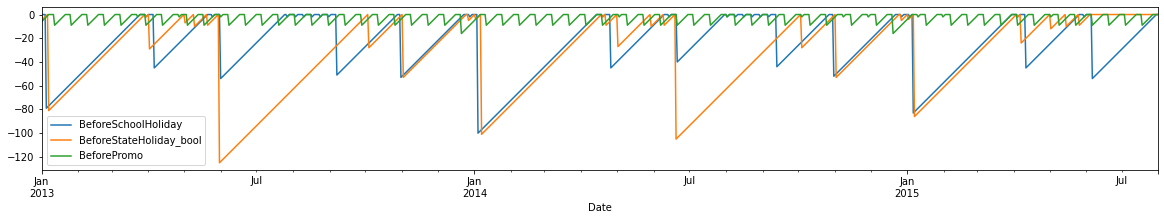

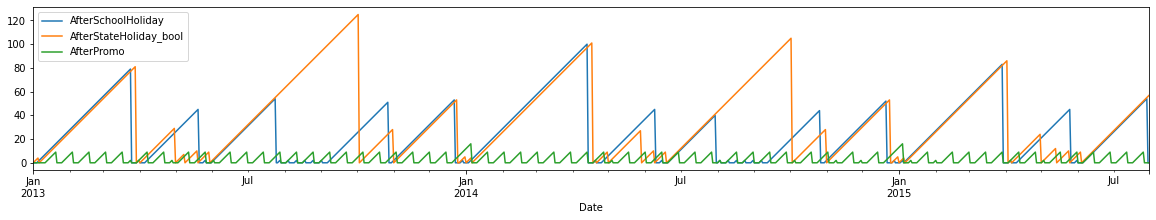

In [31]:
plt.figure(figsize=(20,3))
df_train[df_train['Store'] == 280]['BeforeSchoolHoliday'].plot()
df_train[df_train['Store'] == 280]['BeforeStateHoliday_bool'].plot()
df_train[df_train['Store'] == 280]['BeforePromo'].plot()
plt.legend()
plt.show()

plt.figure(figsize=(20,3))
df_train[df_train['Store'] == 280]['AfterSchoolHoliday'].plot()
df_train[df_train['Store'] == 280]['AfterStateHoliday_bool'].plot()
df_train[df_train['Store'] == 280]['AfterPromo'].plot()
plt.legend()
plt.show()

### "Suavizado" de columnas temporales 

In [32]:
# Datos del store 1 ordenados por fecha
df_train[df_train[['Store']+columns]['Store'] == 1].sort_values('Date').head(20)

,Store,Promo,StateHoliday_bool,SchoolHoliday,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday_bool,BeforeStateHoliday_bool,AfterPromo,BeforePromo
Date,,,,,,,,,,
2013-01-01,1,0,True,1,0,0,0,0,0,-6
2013-01-02,1,0,False,1,0,0,1,-86,0,-5
2013-01-03,1,0,False,1,0,0,2,-85,0,-4
2013-01-04,1,0,False,1,0,0,3,-84,0,-3
2013-01-05,1,0,False,1,0,0,4,-83,0,-2
2013-01-06,1,0,False,1,0,0,5,-82,0,-1
2013-01-07,1,1,False,1,0,0,6,-81,0,0
2013-01-08,1,1,False,1,0,0,7,-80,0,0
2013-01-09,1,1,False,1,0,0,8,-79,0,0


In [33]:
bwd_train = df_train[['Store']+columns].sort_index().groupby("Store").rolling(7, min_periods=1).sum()
bwd_test = df_test[['Store']+columns].sort_index().groupby("Store").rolling(7, min_periods=1).sum()
bwd_train.head(20)

Store  SchoolHoliday  StateHoliday_bool  Promo
Store Date                                                      
1     2013-01-01    1.0            1.0                1.0    0.0
      2013-01-02    2.0            2.0                1.0    0.0
      2013-01-03    3.0            3.0                1.0    0.0
      2013-01-04    4.0            4.0                1.0    0.0
      2013-01-05    5.0            5.0                1.0    0.0
      2013-01-06    6.0            6.0                1.0    0.0
      2013-01-07    7.0            7.0                1.0    1.0
      2013-01-08    7.0            7.0                0.0    2.0
      2013-01-09    7.0            7.0                0.0    3.0
      2013-01-10    7.0            7.0                0.0    4.0
      2013-01-11    7.0            7.0                0.0    5.0
      2013-01-12    7.0            6.0                0.0    5.0
      2013-01-13    7.0            5.0                0.0    5.0
      2013-01-14    7.0            4.0                0.0    4.0
      2013-01-15    7.0            3.0                0.0    3.0
      2013-01-16    7.0            2.0                0.0    2.0
      2013-01-17    7.0            1.0                0.0    1.0
      2013-01-18    7.0            0.0                0.0    0.0
      2013-01-19    7.0            0.0                0.0    0.0
      2013-01-20    7.0            0.0                0.0    0.0

In [34]:
bwd_train.drop('Store',1,inplace=True)
bwd_train.reset_index(inplace=True)
bwd_test.drop('Store',1,inplace=True)
bwd_test.reset_index(inplace=True)

In [35]:
bwd_train.head(20)

,Store,Date,SchoolHoliday,StateHoliday_bool,Promo
0,1,2013-01-01,1.0,1.0,0.0
1,1,2013-01-02,2.0,1.0,0.0
2,1,2013-01-03,3.0,1.0,0.0
3,1,2013-01-04,4.0,1.0,0.0
4,1,2013-01-05,5.0,1.0,0.0
5,1,2013-01-06,6.0,1.0,0.0
6,1,2013-01-07,7.0,1.0,1.0
7,1,2013-01-08,7.0,0.0,2.0
8,1,2013-01-09,7.0,0.0,3.0
9,1,2013-01-10,7.0,0.0,4.0


In [36]:
# Ordena al reves
fwd_train = df_train[['Store']+columns].sort_index(ascending=False).groupby("Store").rolling(7, min_periods=1).sum()
fwd_test = df_test[['Store']+columns].sort_index(ascending=False).groupby("Store").rolling(7, min_periods=1).sum()

In [37]:
fwd_train.head(20)

Store  SchoolHoliday  StateHoliday_bool  Promo
Store Date                                                      
1     2015-07-31    1.0            1.0                0.0    1.0
      2015-07-30    2.0            2.0                0.0    2.0
      2015-07-29    3.0            3.0                0.0    3.0
      2015-07-28    4.0            4.0                0.0    4.0
      2015-07-27    5.0            5.0                0.0    5.0
      2015-07-26    6.0            5.0                0.0    5.0
      2015-07-25    7.0            5.0                0.0    5.0
      2015-07-24    7.0            4.0                0.0    4.0
      2015-07-23    7.0            3.0                0.0    3.0
      2015-07-22    7.0            2.0                0.0    2.0
      2015-07-21    7.0            1.0                0.0    1.0
      2015-07-20    7.0            0.0                0.0    0.0
      2015-07-19    7.0            0.0                0.0    0.0
      2015-07-18    7.0            0.0                0.0    0.0
      2015-07-17    7.0            0.0                0.0    1.0
      2015-07-16    7.0            0.0                0.0    2.0
      2015-07-15    7.0            0.0                0.0    3.0
      2015-07-14    7.0            0.0                0.0    4.0
      2015-07-13    7.0            0.0                0.0    5.0
      2015-07-12    7.0            0.0                0.0    5.0

In [38]:
fwd_train.drop('Store',1,inplace=True)
fwd_train.reset_index(inplace=True)
fwd_test.drop('Store',1,inplace=True)
fwd_test.reset_index(inplace=True)

In [39]:
df_train.reset_index(inplace=True)
df_test.reset_index(inplace=True)

In [40]:
df_train = df_train.merge(bwd_train, 'left', ['Date', 'Store'], suffixes=['', '_bw'])
df_train = df_train.merge(fwd_train, 'left', ['Date', 'Store'], suffixes=['', '_fw'])
df_test = df_test.merge(bwd_test, 'left', ['Date', 'Store'], suffixes=['', '_bw'])
df_test = df_test.merge(fwd_test, 'left', ['Date', 'Store'], suffixes=['', '_fw'])

In [41]:
df_train.drop(columns,1,inplace=True)
df_test.drop(columns,1,inplace=True)

In [42]:
df_train.head()

,Date,Store,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday_bool,BeforeStateHoliday_bool,AfterPromo,BeforePromo,SchoolHoliday_bw,StateHoliday_bool_bw,Promo_bw,SchoolHoliday_fw,StateHoliday_bool_fw,Promo_fw
0,2015-07-31,1,0,0,57,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0
1,2015-07-30,1,0,0,56,0,0,0,4.0,0.0,4.0,2.0,0.0,2.0
2,2015-07-29,1,0,0,55,0,0,0,3.0,0.0,3.0,3.0,0.0,3.0
3,2015-07-28,1,0,0,54,0,0,0,2.0,0.0,2.0,4.0,0.0,4.0
4,2015-07-27,1,0,0,53,0,0,0,1.0,0.0,1.0,5.0,0.0,5.0


In [43]:
df_train["Date"] = pd.to_datetime(df_train.Date)
df_test["Date"] = pd.to_datetime(df_test.Date)

In [44]:
df_train.head()

,Date,Store,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday_bool,BeforeStateHoliday_bool,AfterPromo,BeforePromo,SchoolHoliday_bw,StateHoliday_bool_bw,Promo_bw,SchoolHoliday_fw,StateHoliday_bool_fw,Promo_fw
0,2015-07-31,1,0,0,57,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0
1,2015-07-30,1,0,0,56,0,0,0,4.0,0.0,4.0,2.0,0.0,2.0
2,2015-07-29,1,0,0,55,0,0,0,3.0,0.0,3.0,3.0,0.0,3.0
3,2015-07-28,1,0,0,54,0,0,0,2.0,0.0,2.0,4.0,0.0,4.0
4,2015-07-27,1,0,0,53,0,0,0,1.0,0.0,1.0,5.0,0.0,5.0


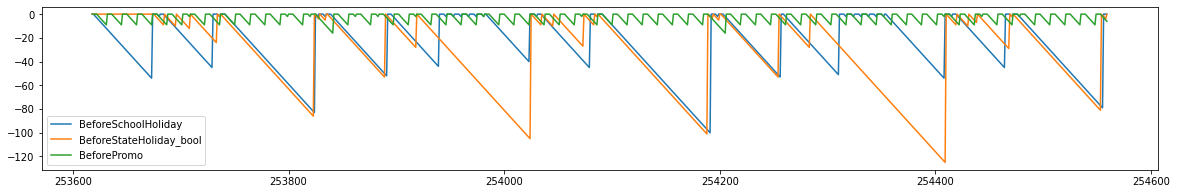

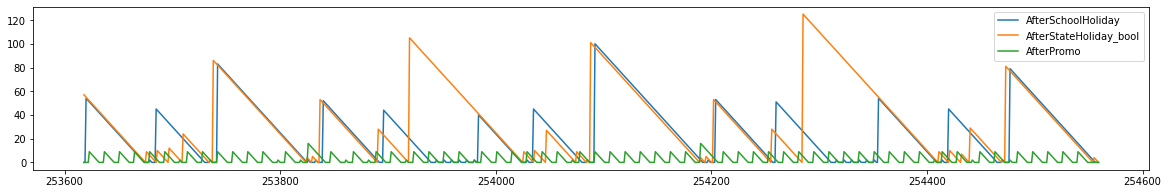

In [45]:
plt.figure(figsize=(20,3))
df_train[df_train['Store'] == 280]['BeforeSchoolHoliday'].plot()
df_train[df_train['Store'] == 280]['BeforeStateHoliday_bool'].plot()
df_train[df_train['Store'] == 280]['BeforePromo'].plot()
plt.legend()
plt.show()

plt.figure(figsize=(20,3))
df_train[df_train['Store'] == 280]['AfterSchoolHoliday'].plot()
df_train[df_train['Store'] == 280]['AfterStateHoliday_bool'].plot()
df_train[df_train['Store'] == 280]['AfterPromo'].plot()
plt.legend()
plt.show()

In [46]:
def join_df(left, right, left_on, right_on=None):
    if right_on is None: right_on = left_on
    return left.merge(right, how='left', left_on=left_on, right_on=right_on, 
                      suffixes=("", "_y"))

In [47]:
joined_train = join_df(joined_train, df_train, ['Store', 'Date'])
joined_test = join_df(joined_test, df_test, ['Store', 'Date'])

In [48]:
joined_train.shape

(1017209, 81)

In [49]:
joined_train.to_feather('all_preprocessed_train.fth')

In [50]:
joined_test.to_feather('all_preprocessed_test.fth')

Text(0.5, 1.0, 'Promo')

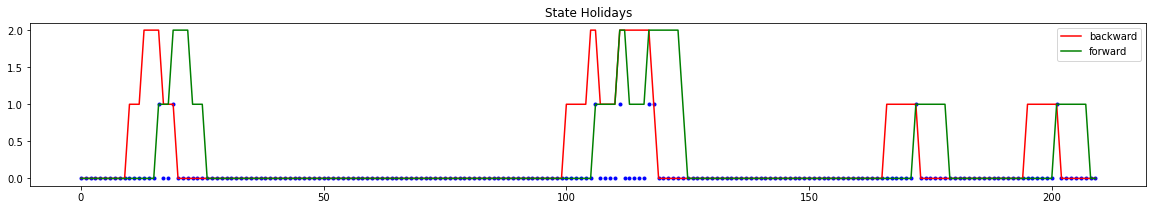

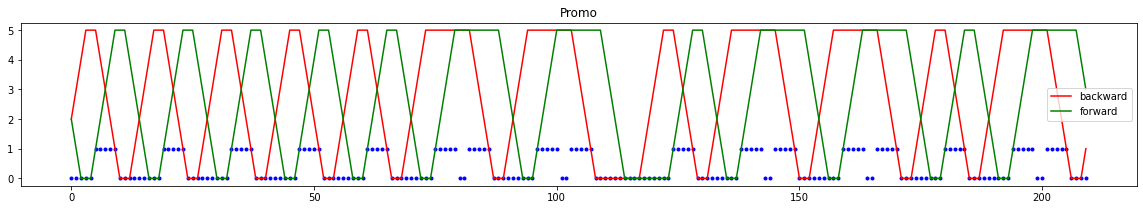

In [51]:
plt.figure(figsize=(20,3))
plt.plot(joined_train[joined_train['Store']==280]['StateHoliday_bool'].values[100:310]*1.0, c='b', marker='.', linestyle='None')
plt.plot(joined_train[joined_train['Store']==280]['StateHoliday_bool_bw'].values[100:310]*1.0, c='r', label='backward')
plt.plot(joined_train[joined_train['Store']==280]['StateHoliday_bool_fw'].values[100:310]*1.0, c='g', label='forward')
plt.legend()
plt.title('State Holidays')
plt.figure(figsize=(20,3))
plt.plot(joined_train[joined_train['Store']==280]['Promo'].values[100:310]*1.0, c='b', marker='.', linestyle='None')
plt.plot(joined_train[joined_train['Store']==280]['Promo_bw'].values[100:310]*1.0, c='r', label='backward')
plt.plot(joined_train[joined_train['Store']==280]['Promo_fw'].values[100:310]*1.0, c='g', label='forward')
plt.legend()
plt.title('Promo')

In [52]:
joined_train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Week,Day,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenSince,Promo2Since,State,file,week,trend,Date_y,Month_y,Day_y,file_DE,week_DE,trend_DE,Date_DE,State_DE,Month_DE,Day_DE,file_y,Max_TemperatureC,...,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_PressurehPa,Mean_Sea_Level_PressurehPa,Min_Sea_Level_PressurehPa,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees,StateName,Year_y,Week_y,CompetitionDaysOpen,CompetitionMonthsOpen,Promo2Days,Promo2Weeks,StateHoliday_bool,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday_bool,BeforeStateHoliday_bool,AfterPromo,BeforePromo,SchoolHoliday_bw,StateHoliday_bool_bw,Promo_bw,SchoolHoliday_fw,StateHoliday_bool_fw,Promo_fw
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31,c,a,1270.0,9,2008,0,1,1990,-,2008-09-15,1990-01-01,HE,Rossmann_DE_HE,2015-08-02 - 2015-08-08,85,2015-08-02,8,2,Rossmann_DE,2015-08-02 - 2015-08-08,83,2015-08-02,None,8,2,Hessen,23,...,8,9,6,3,98,54,18,1021,1018,1015,31.0,15.0,10.0,24,11,21.0,0.00,1.0,Fog,13,Hessen,2015,31,2510,24,9342,25,False,0,0,57,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,31,a,a,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",2007-11-15,2010-03-29,TH,Rossmann_DE_TH,2015-08-02 - 2015-08-08,80,2015-08-02,8,2,Rossmann_DE,2015-08-02 - 2015-08-08,83,2015-08-02,None,8,2,Thueringen,19,...,7,9,6,3,100,62,25,1021,1019,1017,10.0,10.0,10.0,14,11,21.0,0.00,4.0,Fog,309,Thueringen,2015,31,2815,24,1950,25,False,0,0,67,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,31,a,a,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",2006-12-15,2011-04-04,NW,Rossmann_DE_NW,2015-08-02 - 2015-08-08,86,2015-08-02,8,2,Rossmann_DE,2015-08-02 - 2015-08-08,83,2015-08-02,None,8,2,NordrheinWestfalen,21,...,6,10,7,4,100,61,24,1022,1019,1017,31.0,14.0,10.0,14,5,21.0,0.00,2.0,Fog,354,NordrheinWestfalen,2015,31,3150,24,1579,25,False,0,0,57,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,31,c,c,620.0,9,2009,0,1,1990,-,2009-09-15,1990-01-01,BE,Rossmann_DE_BE,2015-08-02 - 2015-08-08,74,2015-08-02,8,2,Rossmann_DE,2015-08-02 - 2015-08-08,83,2015-08-02,None,8,2,Berlin,19,...,9,9,7,4,94,61,30,1019,1017,1014,10.0,10.0,10.0,23,16,21.0,0.00,6.0,Sunny,282,Berlin,2015,31,2145,24,9342,25,False,0,0,67,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,31,a,a,29910.0,4,2015,0,1,1990,-,2015-04-15,1990-01-01,SN,Rossmann_DE_SN,2015-08-02 - 2015-08-08,82,2015-08-02,8,2,Rossmann_DE,2015-08-02 - 2015-08-08,83,2015-08-02,None,8,2,Sachsen,20,...,10,8,6,5,82,55,26,1020,1018,1016,10.0,10.0,10.0,14,11,21.0,0.00,4.0,Sunny,290,Sachsen,2015,31,107,3,9342,25,False,0,0,57,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1,a,a,1900.0,6,2014,1,31,2013,"Jan,Apr,Jul,Oct",2014-06-15,2013-07-29,NW,Rossmann_DE_NW,2013-01-06 - 2013-01-12,63,2013-01-06,1,6,Rossmann_DE,2013-01-06 - 2013-01-12,62,2013-01-06,None,1,6,NordrheinWestfalen,8,...,2,7,5,1,94,87,65,1013,1005,1001,31.0,12.0,4.0,39,26,58.0,5.08,6.0,Rain,215,NordrheinWestfalen,2013,1,0,0,0,0,True,0,0,0,0,0,-6,1.0,1.0,0.0,4.0,1.0,1.0
1017205,1112,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1,c,c,1880.0,4,2006,0,1,1990,-,2006-04-15,1990-01-01,NW,Rossmann_DE_NW,2013-01-06 - 2013-01-12,63,2013-01-06,1,6,Rossmann_DE,2013-01-06 - 2013-01-12,62,2013-01-06,None,1,6,NordrheinWestfale